# Fat Tails in a Huggett Model with Two Assets

The main difference to the previous setup is that individuals now have access to a real risky asset $k_t$ in addition to the riskless bond which we now denote by $b_t$. The budget constraint now becomes: 

$$dk_t + db_t = (z_t + \tilde{R}k_t + r_t b_t - c_t)dt +$$

where $r_t$ is the return on the riskless bond (i.e. the real interest rate), and $\tilde{R}_t$ is the return on the risky asset. The return of the risky asset is stochastic and given by: 

$$\tilde{R}_t dt = Rdt + \sigma dW_t$$

where $R$ is a parameter and $W_t$ is a standard Brownian motion. The problem can be simplified by writing the budget constraint in terms of wealth or net worth $a_t = b_t + k_t$

$$da_t = (z_t + ra_t + (R-r)k_t - c_t)dt + \sigma k_t dW_t$$

The capital satisfy $k_t\ge 0$ and the borriwing constraint $b_t \ge -\phi$ can be written as $k_t \le a_t+\phi$. Then,  the **stationary equilibrium** can be summarized by the `HBJ` and `Kolmogorov` equations

\begin{align}
\rho v(a) &= \max_{c, 0\le k \le a+\phi} u(c) +  v^{'}_j(a)(z_j +ra + (R-r)k-c) + \frac{1}{2}v_j^{''}(a)\sigma^{2}k^2 + \lambda_j(v_{-j}(a)-v_j(a)) \\ 
0 &= -\partial_a (s_j(a)g_j(a))  + \frac{1}{2}\partial_{aa}(\sigma^2 k_j(a)^2 g_j(a)) - \lambda_j g_j(a) + \lambda_{-j} g_{-j}(a)
\end{align}

for $j=1,2$, $s_j(a)$ is the optimal saving policy function and $k_j(a)$ is the optima choice of the risky asset. 


In [2]:
using SparseArrays
using LinearAlgebra
using Plots; pyplot();
using LaTeXStrings
using Parameters
using NBInclude
using Statistics
using StatsBase
using Base

include("1_Parameters.jl")
include("2_Steady_state.jl");

In [3]:
he = Economy(λ1=0.01, λ2=0.01);
v0 = initial_V(he);

@time V, ssb, ssf ,c, k = Hugget_partialEq(he,v0);
gg, g, adot, da_tilde = FPE(he, ssb, ssf, c, k);
x, f, ζ = Logf(he, g, da_tilde);

 Value Function Converged, Iteration = 10 
  8.463944 seconds (18.07 M allocations: 1.141 GiB, 4.53% gc time, 97.43% compilation time: 0% of which was recompilation)


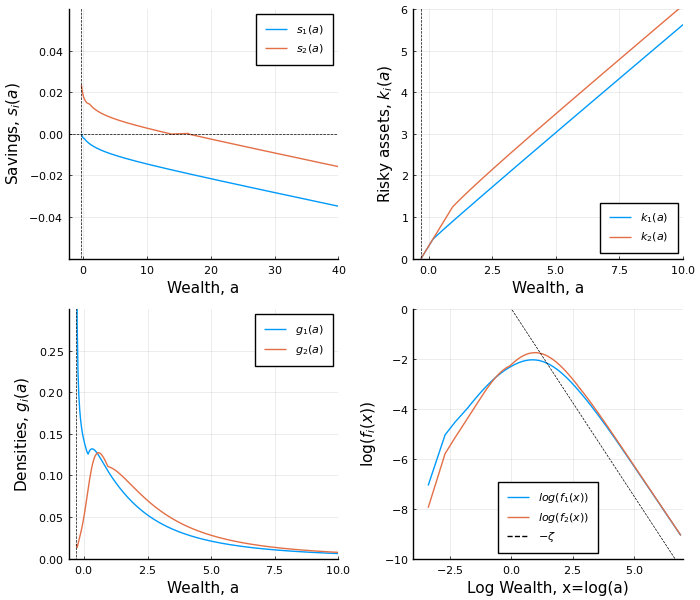

In [4]:
p1 = plot(he.a, adot[:,1], label=L"s_1(a)", xlabel="Wealth, a", ylabel="Savings, "*L"s_i(a)")
p1 = plot!(he.a, adot[:,2], label=L"s_2(a)")
p1 = hline!([0], linestyle=:dash, color="black", label="", lw=0.5)
p1 = vline!([he.amin], linestyle=:dash, color="black", label="", lw=0.5)
p1 = xlims!((he.amin-2,40))
p1 = ylims!((-0.06,0.06))

p2 = plot(he.a, k[:,1], label=L"k_1(a)", xlabel="Wealth, a", ylabel="Risky assets, "*L"k_i(a)", legend=:bottomright)
p2 = plot!(he.a, k[:,2], label=L"k_2(a)")
p2 = vline!([he.amin], linestyle=:dash, color="black", label="", lw=0.5)
p2 = xlims!((he.amin-0.3, 10))
p2 = ylims!((0,6))

p3 = plot(he.a, g[:,1], label=L"g_1(a)", xlabel="Wealth, a", ylabel="Densities, "*L"g_i(a)")
p3 = plot!(he.a, g[:,2], label=L"g_2(a)")
p3 = vline!([he.amin], linestyle=:dash, color="black", label="", lw=0.5)
p3 = xlims!((he.amin-0.3, 10))
p3 = ylims!((0,0.3))

p4 = plot(x, log.(f[:,1]), label=L"log(f_1(x))", xlabel="Log Wealth, x=log(a)", ylabel="log"*L"(f_i(x))", legend=:bottom)
p4 = plot!(x, log.(f[:,2]), label=L"log(f_2(x))")
p4 = plot!(x, -ζ*x, label=L"-\zeta", linestyle=:dash, color="black", lw=0.5)
# p4 = vline!([he.amin], linestyle=:dash, color="black", label="", lw=0.5)
p4 = xlims!((-4, 7))
p4 = ylims!((-10, 0))

plot(p1,p2,p3,p4, size=(700,600))